In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset notice how = left
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Combine the data into a single dataset notice how = right
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="right", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [17]:
# Combine the data into a single dataset notice how = outer
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="outer", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [18]:
#Building challenge

total_rides = pyber_data_df.groupby("type").count()["ride_id"]
# print (total_rides)

total_drivers = pyber_data_df.groupby("type").sum()["driver_count"]
# print (total_drivers)

total_fares = pyber_data_df.groupby("type").sum()["fare"]
# print (total_fares)

average_fare_rides = total_fares/total_rides
print(average_fare_rides)

average_fare_drivers = total_fares/total_drivers
#print (average_fare_drivers)

challenge_data_df = pd.merge(total_rides.rename("Total Rides"), total_drivers.rename("Total Drivers"),left_index=True, right_index=True)
challenge_data_df = pd.merge(challenge_data_df, total_fares.rename("Total Fares"),left_index=True, right_index=True)
challenge_data_df = pd.merge(challenge_data_df, average_fare_rides.rename("Average Fare Per Ride"),left_index=True, right_index=True)
challenge_data_df = pd.merge(challenge_data_df, average_fare_drivers.rename("Average Fare Per Driver"),left_index=True, right_index=True)

challenge_data_df['Total Rides'] = challenge_data_df['Total Rides'].map('{:,}'.format)
challenge_data_df['Total Drivers'] = challenge_data_df['Total Drivers'].map('{:,}'.format)

challenge_data_df['Total Fares'] = challenge_data_df['Total Fares'].map('${:,.2f}'.format)
challenge_data_df['Average Fare Per Ride'] = challenge_data_df['Average Fare Per Ride'].map('${:,.2f}'.format)
challenge_data_df['Average Fare Per Driver'] = challenge_data_df['Average Fare Per Driver'].map('${:,.2f}'.format)
challenge_data_df

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [19]:
#CHALLENGE PART TWO

#fix rename command
pyber_data_df.rename(columns={'date':'Date', 'city':'City','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True)

#fix indexing to date, Set the index to the Date column.
pyber_data_df['Date'] = pd.to_datetime(pyber_data_df.Date, format="%Y-%m-%d")
pyber_data_df.set_index('Date', inplace = True)
pyber_data_df=pyber_data_df.sort_index(axis = 0)

pyber_data_df.head()



,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-01 00:08:16,Liumouth,37.91,5673666505216,69,Urban
2019-01-01 00:46:46,Colemanland,47.74,2215912677020,23,Suburban
2019-01-01 02:07:24,Sotoville,24.07,7827431948090,10,Suburban
2019-01-01 03:46:50,Royland,7.57,5815378003370,64,Urban
2019-01-01 05:23:21,West Heidi,10.75,6571513080673,28,Urban


In [20]:
#Create a new DataFrame, for fares, include City Type and Fare columns using the copy() method on the merged DataFrame.
pyber_fares = pyber_data_df[['City Type','Fare']].copy()
#pyber_fares_df['Fare'] = pyber_fares_df['Fare'].map('${:,.2f}'.format)
pyber_fares.head()

,City Type,Fare
Date,,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75


In [21]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_fares.groupby([pyber_fares.index, "City Type"]).sum()
fares_by_type = sum_fares_by_type.unstack()
fares_by_type.head()

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [22]:
fbt = fares_by_type.loc['2019-01-01':'2019-04-28']
fbt = fbt.resample('W').sum()
fbt.head()

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94

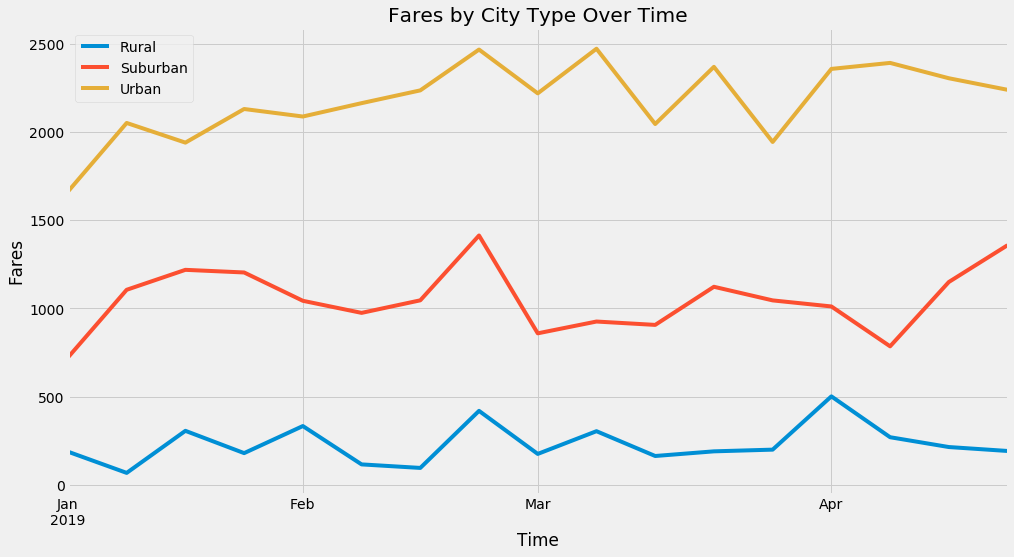

In [30]:
fig = plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
fbt.Fare.Rural.plot()
fbt.Fare.Suburban.plot()
fbt.Fare.Urban.plot()
plt.title('Fares by City Type Over Time')
plt.ylabel('Fares')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.show()
# plt.savefig('analysis/fares_by_city_type.png')